In [1]:
import os
import time

import numpy as np

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from torchdiffeq import odeint_adjoint as odeint
#from torchdiffeq import odeint


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_time = 10
batch_size = 20
data_size = 1000

viz = True

In [3]:
def get_batch():
    s = torch.from_numpy(np.random.choice(np.arange(data_size - batch_time, dtype=np.int64), batch_size, replace=False))
    batch_y0 = true_y[s]  # (M, D)
    batch_t = t[:batch_time]  # (T)
    batch_y = torch.stack([true_y[s + i] for i in range(batch_time)], dim=0)  # (T, M, D)
    return batch_y0.to(device), batch_t.to(device), batch_y.to(device)


In [4]:
def visualize(true_y, pred_y, odefunc, itr):  
    if viz:
        fig = plt.figure(figsize=(12, 4), facecolor='white')
        ax_traj = fig.add_subplot(131, frameon=False)
        ax_traj.cla()
        ax_traj.set_title('Trajectories')
        ax_traj.set_xlabel('t')
        ax_traj.set_ylabel('x,y')
        ax_traj.plot(t.cpu().numpy(), true_y.cpu().numpy()[:, 0, 0],label="Prey")
        ax_traj.plot(t.cpu().numpy(), true_y.cpu().numpy()[:, 0, 1], 'g-',label="Predator")
        ax_traj.plot(t.cpu().numpy(), pred_y.cpu().numpy()[:, 0, 0], '--', label="Prey Pred")
        ax_traj.plot(t.cpu().numpy(), pred_y.cpu().numpy()[:, 0, 1], 'b--', label="Predator Pred")
        ax_traj.set_xlim(t.cpu().min(), t.cpu().max())
        ax_traj.set_ylim(0, 8)
        ax_traj.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
        #fig.tight_layout()
        plt.draw()
        plt.pause(0.01)


In [5]:
class RunningAverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self, momentum=0.99):
        self.momentum = momentum
        self.reset()

    def reset(self):
        self.val = None
        self.avg = 0

    def update(self, val):
        if self.val is None:
            self.avg = val
        else:
            self.avg = self.avg * self.momentum + val * (1 - self.momentum)
        self.val = val

In [6]:
class ODEFunc(nn.Module):

    def __init__(self):
        super(ODEFunc, self).__init__()

        self.net = nn.Sequential(
            nn.Linear(2, 50),
            nn.Tanh(),
            nn.Linear(50, 2),
        )

        for m in self.net.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0, std=0.1)
                nn.init.constant_(m.bias, val=0)

    def forward(self, t, y):
        return self.net(y)


In [7]:
true_y0 = torch.tensor([[1, 1.]]).to(device)
t = torch.linspace(0., 25., data_size).to(device)

class LVeq(nn.Module):
    
    def __init__(self, a=1.5, b=1., c=3., d=1.):
        super(LVeq, self).__init__()
        
        self.a = a
        self.b = b
        self.c = c
        self.d = d

    def forward(self, t, y):
        """ Return the growth rate of predator and prey populations. """
        return torch.cat(((self.a*y[0][0] - self.b*y[0][0]*y[0][1]).view(1) ,
                          (-self.c*y[0][1] + self.d*y[0][0]*y[0][1]).view(1))).unsqueeze(0)

    
with torch.no_grad():
    true_y = odeint(LVeq(), true_y0, t)

Iter 0001 | Total Loss 7.419727


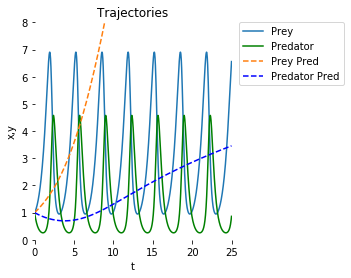

Iter 0025 | Total Loss 7.250250


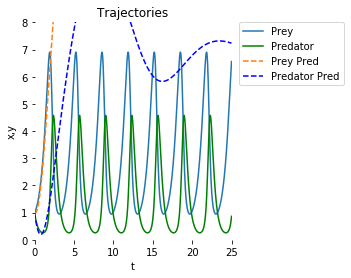

Iter 0026 | Total Loss 5.670708


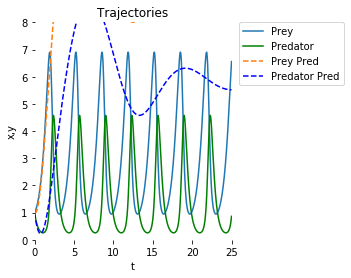

Iter 0027 | Total Loss 4.819283


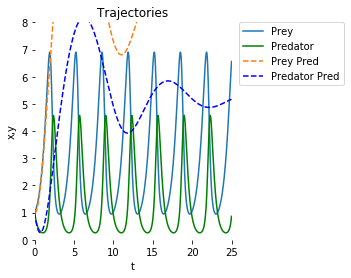

Iter 0028 | Total Loss 4.116066


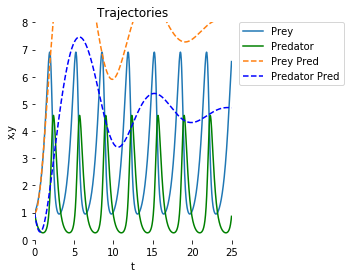

Iter 0029 | Total Loss 3.684919


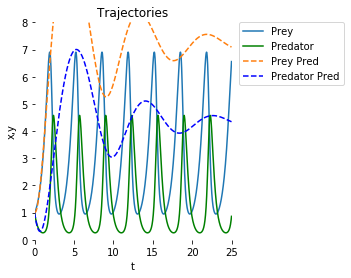

Iter 0030 | Total Loss 3.377659


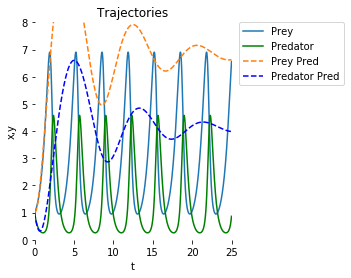

Iter 0031 | Total Loss 3.072440


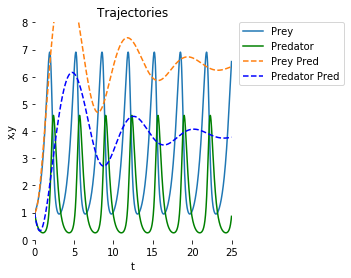

Iter 0032 | Total Loss 2.891721


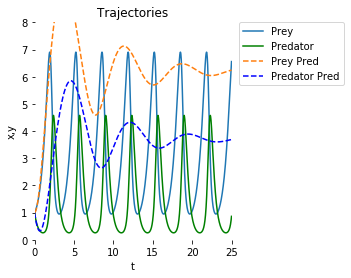

Iter 0035 | Total Loss 2.887876


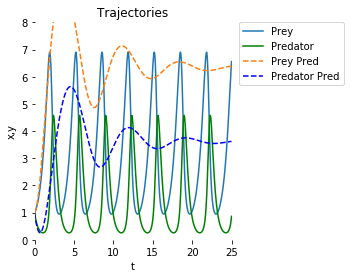

Iter 0036 | Total Loss 2.729071


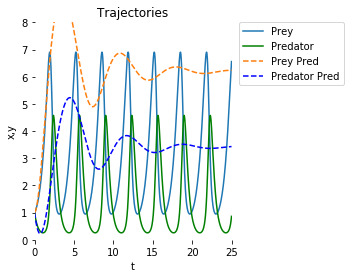

Iter 0037 | Total Loss 2.535803


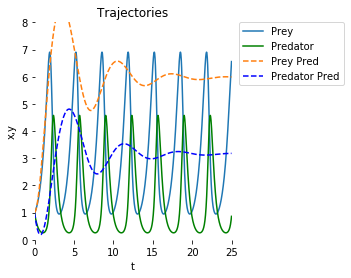

Iter 0039 | Total Loss 2.445793


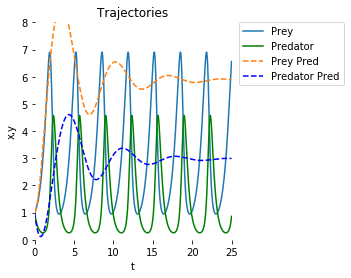

Iter 0041 | Total Loss 2.428348


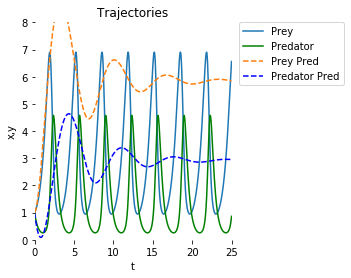

Iter 0042 | Total Loss 2.283500


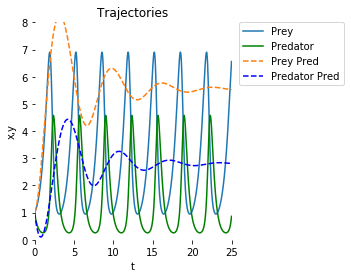

Iter 0043 | Total Loss 2.174668


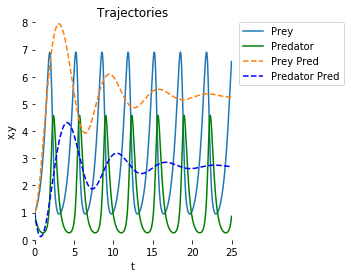

Iter 0044 | Total Loss 2.061506


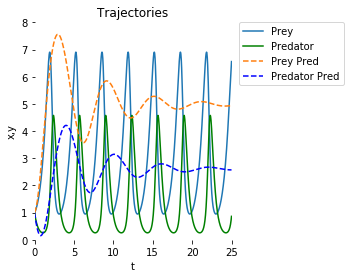

Iter 0045 | Total Loss 2.057892


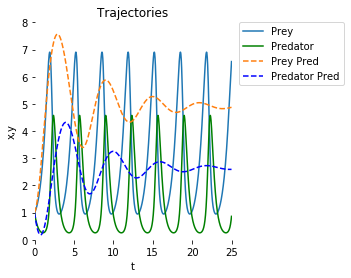

Iter 0046 | Total Loss 2.037285


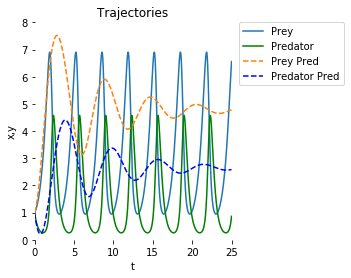

Iter 0048 | Total Loss 1.991215


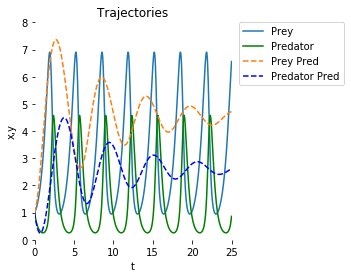

Iter 0049 | Total Loss 1.962725


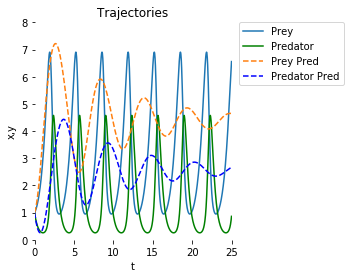

Iter 0050 | Total Loss 1.941519


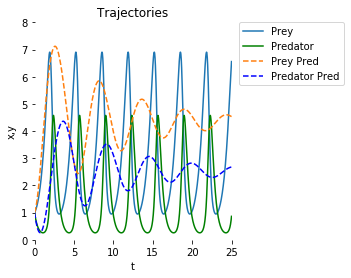

Iter 0051 | Total Loss 1.889296


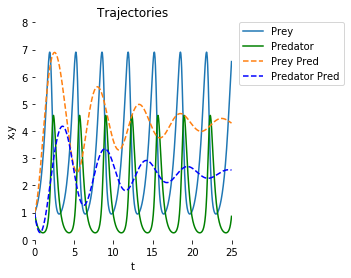

Iter 0052 | Total Loss 1.812960


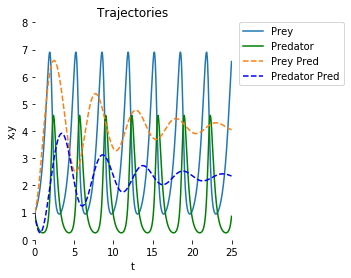

Iter 0053 | Total Loss 1.750100


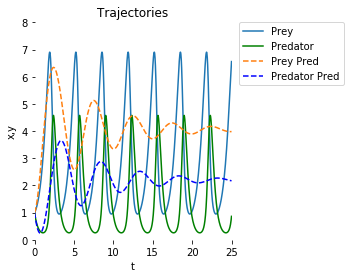

Iter 0054 | Total Loss 1.702705


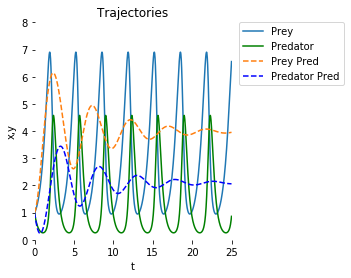

Iter 0055 | Total Loss 1.669272


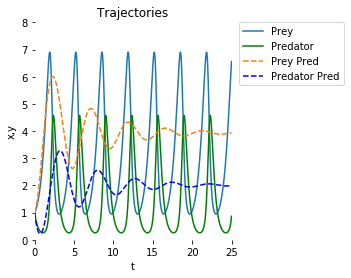

Iter 0058 | Total Loss 1.664096


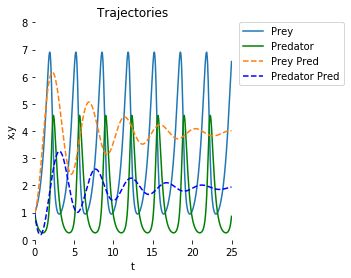

Iter 0060 | Total Loss 1.630362


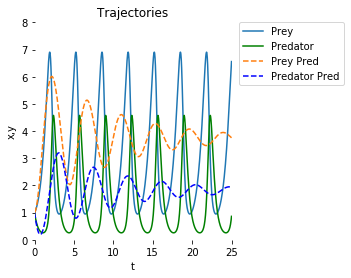

Iter 0061 | Total Loss 1.613934


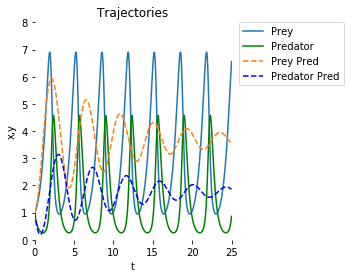

Iter 0062 | Total Loss 1.588766


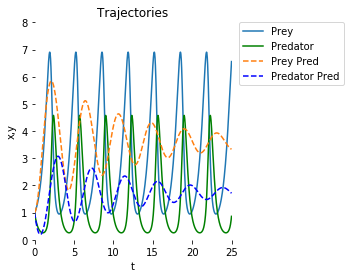

Iter 0063 | Total Loss 1.573767


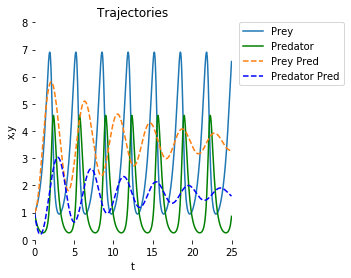

Iter 0064 | Total Loss 1.562120


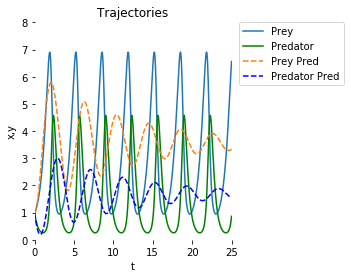

Iter 0077 | Total Loss 1.520281


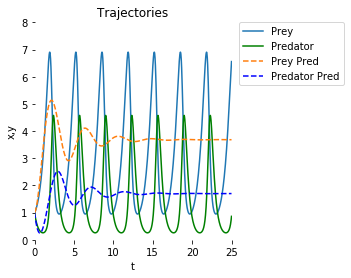

Iter 0078 | Total Loss 1.462643


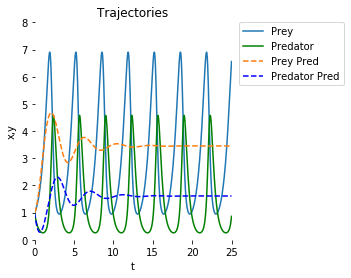

Iter 0079 | Total Loss 1.440339


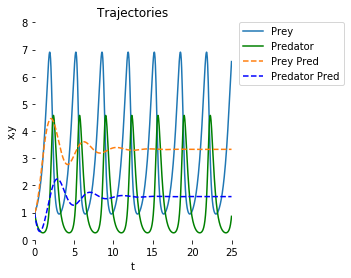

Iter 0080 | Total Loss 1.425779


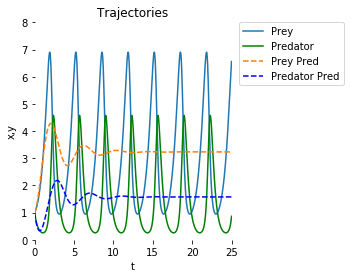

Iter 0081 | Total Loss 1.415286


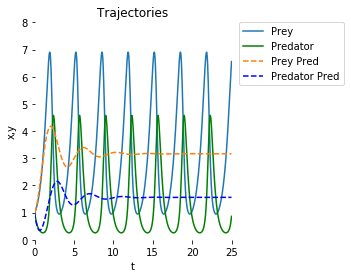

Iter 0082 | Total Loss 1.407323


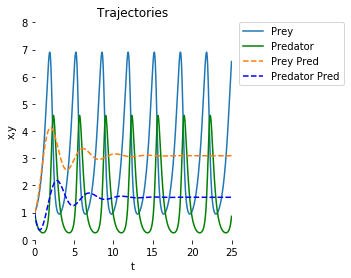

Iter 0117 | Total Loss 1.365314


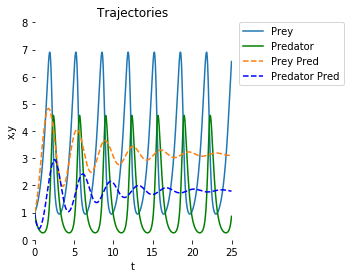

Iter 0118 | Total Loss 1.334166


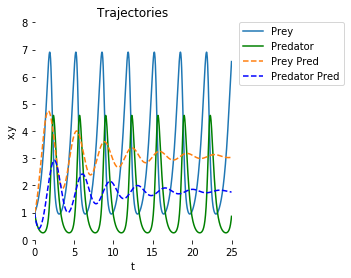

Iter 0122 | Total Loss 1.306014


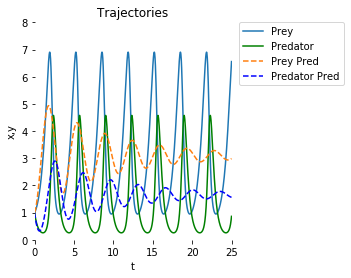

Iter 0135 | Total Loss 1.204981


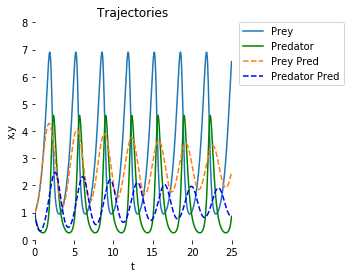

Iter 0164 | Total Loss 1.186452


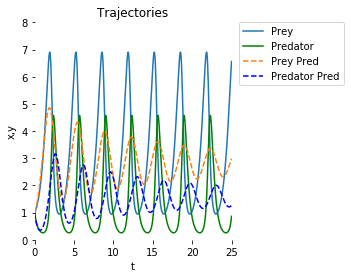

Iter 0177 | Total Loss 1.006503


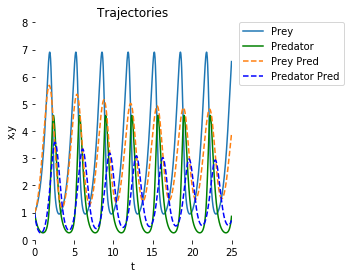

Iter 0178 | Total Loss 0.740456


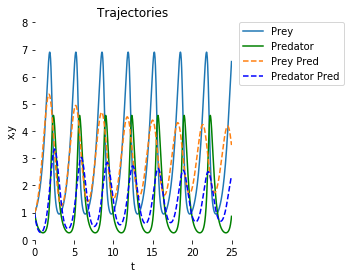

Iter 0180 | Total Loss 0.694821


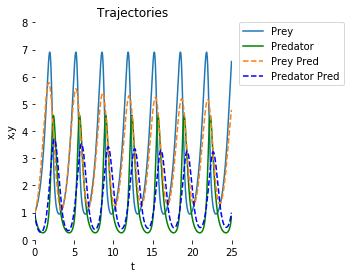

Iter 0182 | Total Loss 0.669307


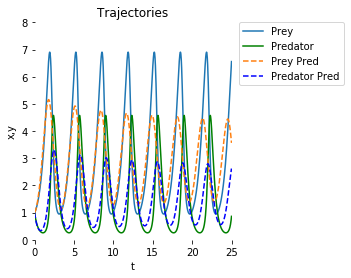

Iter 0195 | Total Loss 0.474572


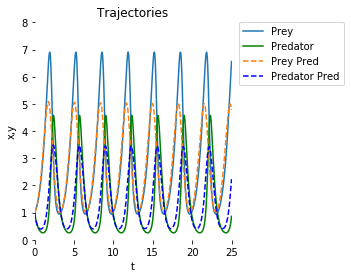

Iter 0284 | Total Loss 0.412796


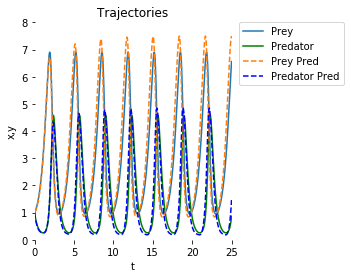

Iter 0300 | Total Loss 0.253589


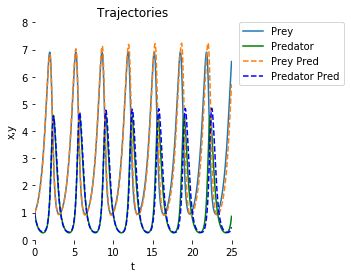

Iter 0305 | Total Loss 0.202894


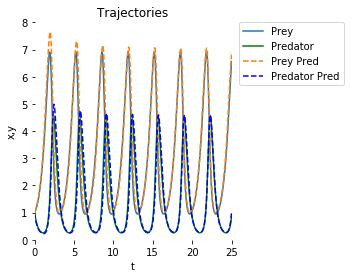

Iter 0381 | Total Loss 0.123251


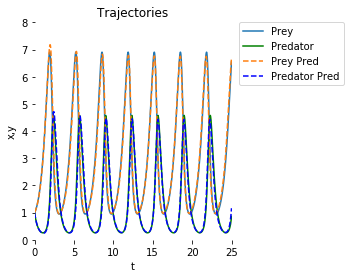

Iter 0502 | Total Loss 0.089332


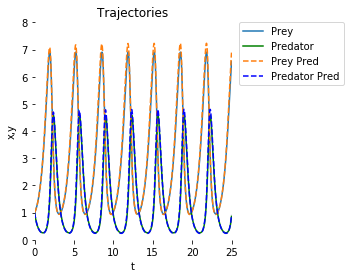

Iter 1431 | Total Loss 0.083098


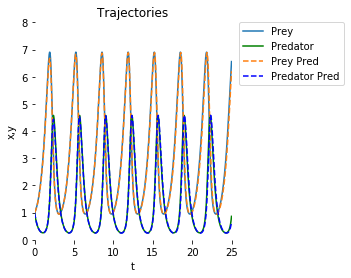

Iter 1434 | Total Loss 0.055749


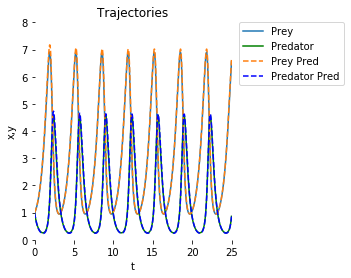

Iter 1999 | Total Loss 0.043182


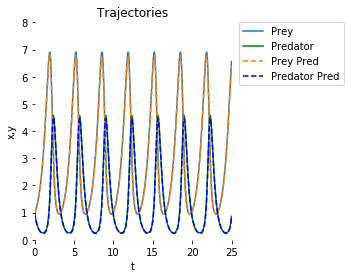

In [8]:
ii = 0
niters = 2000
min_loss = 1000
lr = 1e-2
meter_momentum = 0.97

func = ODEFunc().to(device)
optimizer = optim.Adam(func.parameters(), lr=lr)
end = time.time()

time_meter = RunningAverageMeter(meter_momentum)
loss_meter = RunningAverageMeter(meter_momentum)

for itr in range(1, niters + 1):
    optimizer.zero_grad()
    batch_y0, batch_t, batch_y = get_batch()
    pred_y = odeint(func, batch_y0, batch_t).to(device)
    loss = torch.mean(torch.abs(pred_y - batch_y))
    #loss = loss_func(pred_y, batch_y)
    loss.backward()
    optimizer.step()

    time_meter.update(time.time() - end)
    loss_meter.update(loss.item())

    with torch.no_grad():
        pred_y = odeint(func, true_y0, t)
        loss = torch.mean(torch.abs(pred_y - true_y))
        #loss = loss_func(pred_y, true_y)
        if loss < min_loss:
            min_loss = loss
            print('Iter {:04d} | Total Loss {:.6f}'.format(itr, loss.item()))
            visualize(true_y, pred_y, func, ii)
        ii += 1

    end = time.time()